In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation

In [2]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = (0.5 * X + np.random.normal(0, 1, 100) > 4).astype(int)

In [3]:
# adding a bias term
X_b = np.c_[np.ones(X.shape[0]), X] # (100, 2)

In [4]:
	# sigmoid function
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

In [5]:
# log likelohod function
def log_likelihood(X, y, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


In [6]:
# gradient
def gradient(X, y, theta):
	z = np.dot(X, theta)
	h = sigmoid(z)
	return np.dot(X.T, (y - h))

In [7]:
# gredient ascent
def gradient_ascent(X, y, alpha=0.01, num_iterations=1000):
    theta = np.zeros(X.shape[1])
    path = []
    for i in range(num_iterations):
        theta = theta + alpha * gradient(X, y, theta)
        path.append(theta.copy())
    return np.array(path)

In [8]:
path = gradient_ascent(X_b, y, alpha=0.05, num_iterations=100)

In [9]:
path

array([[ -1.4       ,  -3.02020202],
       [ -0.3412727 ,   6.44704245],
       [ -4.15856589,  -9.06042741],
       [ -3.05985499,   0.41928292],
       [ -3.59300192,  -1.49699666],
       [ -2.50266325,   7.97677617],
       [ -6.21913559,  -7.50728057],
       [ -5.11932262,   1.97250074],
       [ -7.70827375, -11.67248834],
       [ -6.60830617,  -2.19269181],
       [ -5.50864545,   7.28696788],
       [ -9.00925998,  -8.0769173 ],
       [ -7.90927094,   1.40287981],
       [ -8.99412034,  -5.84491356],
       [ -7.89413426,   3.63488267],
       [-10.69406539, -10.65677049],
       [ -9.59406711,  -1.1769726 ],
       [ -8.4940975 ,   8.30280107],
       [-11.86268491,  -6.94697556],
       [-10.76268561,   2.53282235],
       [-12.53428568,  -8.39191287],
       [-11.43428599,   1.08788508],
       [-10.5498535 ,   8.62407115],
       [-13.81931749,  -6.51522758],
       [-12.7193176 ,   2.96457039],
       [-14.47054834,  -7.90745239],
       [-13.37054839,   1.57234559],
 

In [10]:
t0_range = np.linspace(-5, 5, 100)
t1_range = np.linspace(-1, 2, 100)
T0, T1 = np.meshgrid(t0_range, t1_range)

In [11]:
LL = np.array([ log_likelihood(X_b, y, np.array([t0, t1])) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))]).reshape(T0.shape)

In [12]:
LL.shape

(100, 100)

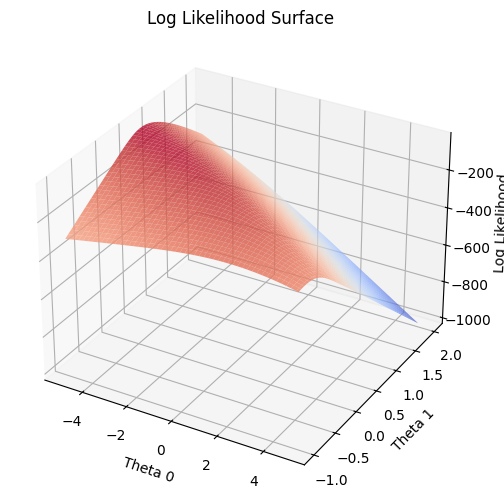

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, LL, cmap=cm.coolwarm, alpha=0.8)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Likelihood')
ax.set_title('Log Likelihood Surface')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_9532\1997680515.py:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\admin\AppData\Local\Temp\ipykernel_9532\1997680515.py:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


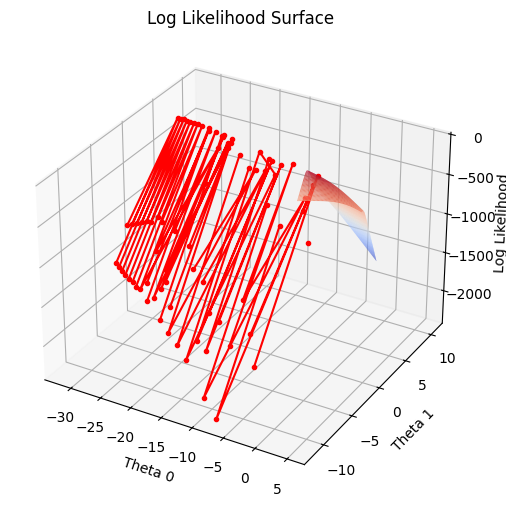

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, LL, cmap=cm.coolwarm, alpha=0.8)
ax.plot(path[:, 0], path[:, 1], [log_likelihood(X_b, y, theta) for theta in path], color='red', marker='o', markersize=3, label='Gradient Ascent Path')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Likelihood')
ax.set_title('Log Likelihood Surface')
plt.show()